In [1]:
from ipynb.fs.full.quantumsystem import QuantumSystem, qs, System, HyperSystem
from ipynb.fs.full.quantumsystem import IntegerSystem, IntegerArraySystem

In [2]:
class ArmorPlating(IntegerSystem):
    """ asdf """

In [3]:
class ArmorStructural(IntegerSystem):
    """ asdf """

In [4]:
class ArmorPlatingDamage(IntegerSystem):
    """ asdf """

In [5]:
class ArmorStructuralDamage(IntegerSystem):
    """ asdf """

In [6]:
@ArmorPlatingDamage.sd
@ArmorPlating.sd
@ArmorStructuralDamage.sd
@ArmorStructural.sd
class Armor(HyperSystem):
    """ asdf """

In [7]:
class EngineCriticalHits(IntegerSystem):
    """ asdf """

In [8]:
class FireControlCriticalHits(IntegerSystem):
    """ asdf """

In [9]:
class MPCriticalHits(IntegerSystem):
    """ asdf """

In [10]:
class WeaponsCriticalHits(IntegerSystem):
    """ asdf """

In [11]:
class CriticalHits(HyperSystem):
    systems = [EngineCriticalHits, FireControlCriticalHits, MPCriticalHits, WeaponsCriticalHits]

In [12]:
@Armor.sd
@CriticalHits.sd
class UnitDamage(HyperSystem):
    @classmethod
    @ArmorPlatingDamage.d
    @ArmorPlating.d
    @ArmorStructuralDamage.d
    @ArmorStructural.d
    def take_damage(cls, entity: str, damage_value: int,
                    armorstructural, armorstructuraldamage, armorplating, armorplatingdamage):
        available_plating = armorplating - armorplatingdamage
        available_structural = armorstructural - armorstructuraldamage
        if available_plating >= damage_value:
            ArmorPlatingDamage.set_relationship(entity, armorplatingdamage + damage_value)
        else:
            plating_damage = available_plating
            structural_damage = damage_value - available_plating
            ArmorPlatingDamage.set_relationship(entity, armorplatingdamage + plating_damage)
            ArmorStructuralDamage.set_relationship(entity, armorstructuraldamage + structural_damage)

    @classmethod
    @ArmorStructuralDamage.d
    @ArmorStructural.d
    def is_destroyed(cls, entity: str,
                    armorstructural, armorstructuraldamage):
        return armorstructural < armorstructuraldamage

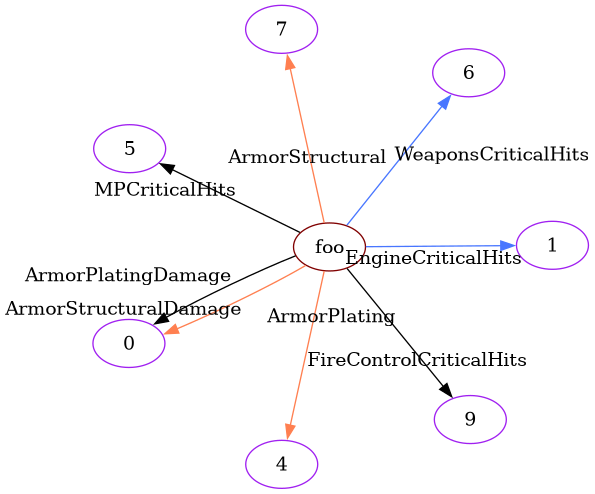

In [13]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()
    UnitDamage.build_system("foo", {
        "Armor": {
            "ArmorPlating": "9",
            "ArmorPlatingDamage": 0,
            "ArmorStructural": "7",
            "ArmorStructuralDamage": 0
        },
        "CriticalHits": ["1", "4", "5", "6"]})
    display(qs.render())

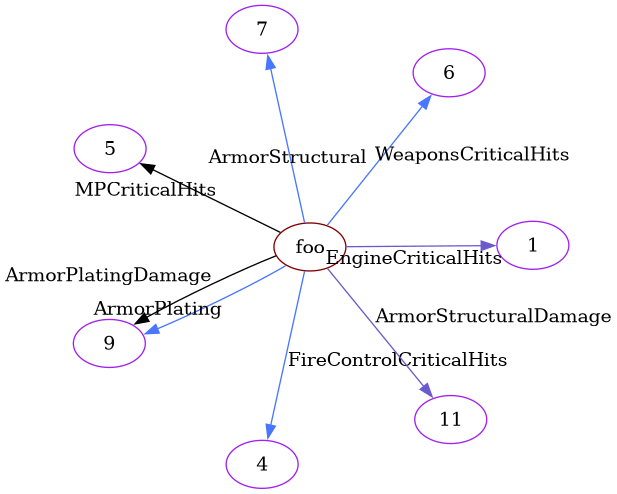

In [14]:
if __name__ == "__main__":
    assert ArmorPlatingDamage.get_relationship("foo") == 0 and ArmorStructuralDamage.get_relationship("foo") == 0
    assert not UnitDamage.is_destroyed(entity="foo")
    
    UnitDamage.take_damage(entity="foo", damage_value=5)
    assert ArmorPlatingDamage.get_relationship("foo") == 5 and ArmorStructuralDamage.get_relationship("foo") == 0
    assert not UnitDamage.is_destroyed(entity="foo")
    
    UnitDamage.take_damage(entity="foo", damage_value=5)
    assert ArmorPlatingDamage.get_relationship("foo") == 9 and ArmorStructuralDamage.get_relationship("foo") == 1
    assert not UnitDamage.is_destroyed(entity="foo")
    
    UnitDamage.take_damage(entity="foo", damage_value=10)
    assert UnitDamage.is_destroyed(entity="foo")
    display(qs.render())

In [18]:
UnitDamage.get_entities()

OperationalError: near "__main__": syntax error